In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [15]:
# Cargar los datos
# Cargar el dataset
data = pd.read_csv('movies.csv')

# Preprocesamiento de datos
data['production_year'] = pd.to_datetime(data['production_date']).dt.year
data['production_month'] = pd.to_datetime(data['production_date']).dt.month

genres_dummies = data['genres'].str.get_dummies(sep=',')
data = pd.concat([data, genres_dummies], axis=1)

data.fillna(-1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           4380 non-null   object 
 1   production_date       4380 non-null   object 
 2   genres                4380 non-null   object 
 3   runtime_minutes       4380 non-null   float64
 4   director_name         4380 non-null   object 
 5   director_professions  4380 non-null   object 
 6   director_birthYear    4380 non-null   object 
 7   director_deathYear    4380 non-null   object 
 8   movie_averageRating   4380 non-null   float64
 9   movie_numerOfVotes    4380 non-null   float64
 10  approval_Index        4380 non-null   float64
 11  Production budget $   4380 non-null   int64  
 12  Domestic gross $      4380 non-null   int64  
 13  Worldwide gross $     4380 non-null   int64  
 14  production_year       4380 non-null   int32  
dtypes: float64(4), int32(

In [21]:
X = data[['production_year', 'production_month', 'runtime_minutes', 'movie_averageRating', 'movie_numerOfVotes',
          'Production budget $', 'Domestic gross $', 'Worldwide gross $'] + list(genres_dummies.columns)]
y = data['approval_Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Función para construir, compilar y entrenar una red neuronal
def build_and_train_model(layers, activation, dropout_rate=None, l2_rate=None, epochs=50, batch_size=32):
    model = Sequential()
    for i, layer in enumerate(layers):
        if i == 0:
            model.add(Dense(layer, activation=activation, input_shape=(X_train.shape[1],),
                            kernel_regularizer=l2(l2_rate) if l2_rate else None))
        else:
            model.add(Dense(layer, activation=activation, kernel_regularizer=l2(l2_rate) if l2_rate else None))
        if dropout_rate:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, batch_size=batch_size, verbose=0)
    
    return model, history

In [23]:
# Red Neuronal 1
model1, history1 = build_and_train_model([64, 32, 16], 'relu', dropout_rate=0.5)


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Red Neuronal 2
model2, history2 = build_and_train_model([128, 64], 'sigmoid', l2_rate=0.001)


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Red Neuronal 3
model3, history3 = build_and_train_model([128, 64, 32, 16], 'tanh', dropout_rate=0.3, l2_rate=0.0001)


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Evaluación de los modelos
mse_train1 = model1.evaluate(X_train, y_train, verbose=0)
mse_test1 = model1.evaluate(X_test, y_test, verbose=0)

mse_train2 = model2.evaluate(X_train, y_train, verbose=0)
mse_test2 = model2.evaluate(X_test, y_test, verbose=0)

mse_train3 = model3.evaluate(X_train, y_train, verbose=0)
mse_test3 = model3.evaluate(X_test, y_test, verbose=0)

In [27]:
print(f"Red Neuronal 1 - MSE en el conjunto de entrenamiento: {mse_train1}")
print(f"Red Neuronal 1 - MSE en el conjunto de prueba: {mse_test1}")

print(f"Red Neuronal 2 - MSE en el conjunto de entrenamiento: {mse_train2}")
print(f"Red Neuronal 2 - MSE en el conjunto de prueba: {mse_test2}")

print(f"Red Neuronal 3 - MSE en el conjunto de entrenamiento: {mse_train3}")
print(f"Red Neuronal 3 - MSE en el conjunto de prueba: {mse_test3}")


Red Neuronal 1 - MSE en el conjunto de entrenamiento: 0.49559059739112854
Red Neuronal 1 - MSE en el conjunto de prueba: 0.5074187517166138
Red Neuronal 2 - MSE en el conjunto de entrenamiento: 0.2523293197154999
Red Neuronal 2 - MSE en el conjunto de prueba: 0.22422650456428528
Red Neuronal 3 - MSE en el conjunto de entrenamiento: 0.22896915674209595
Red Neuronal 3 - MSE en el conjunto de prueba: 0.21858268976211548


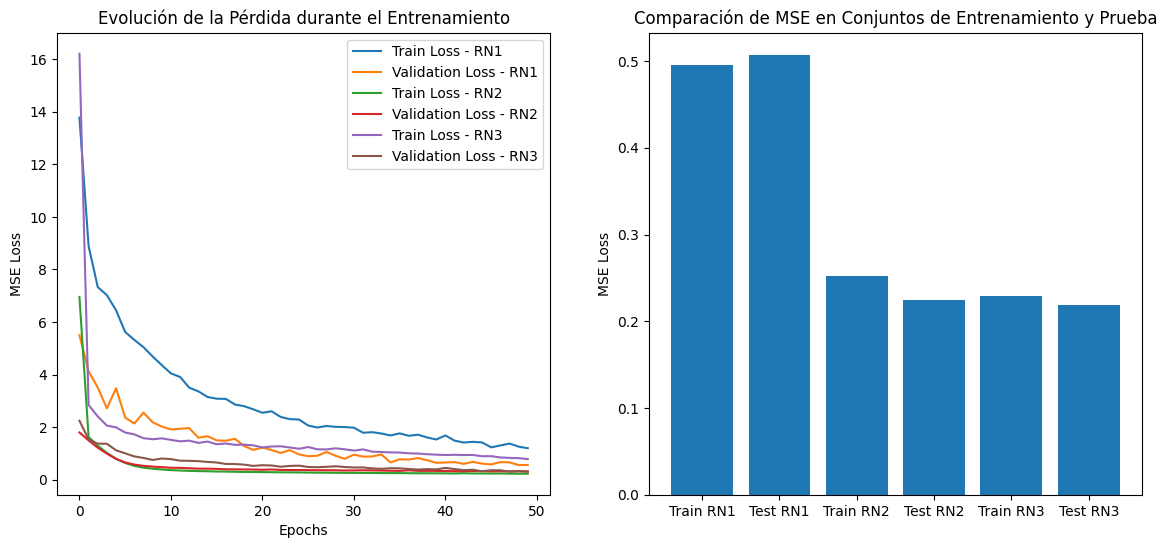

In [28]:
# Gráficos de la evolución del entrenamiento
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Train Loss - RN1')
plt.plot(history1.history['val_loss'], label='Validation Loss - RN1')
plt.plot(history2.history['loss'], label='Train Loss - RN2')
plt.plot(history2.history['val_loss'], label='Validation Loss - RN2')
plt.plot(history3.history['loss'], label='Train Loss - RN3')
plt.plot(history3.history['val_loss'], label='Validation Loss - RN3')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Evolución de la Pérdida durante el Entrenamiento')

plt.subplot(1, 2, 2)
bars = plt.bar(['Train RN1', 'Test RN1', 'Train RN2', 'Test RN2', 'Train RN3', 'Test RN3'], 
               [mse_train1, mse_test1, mse_train2, mse_test2, mse_train3, mse_test3])
plt.ylabel('MSE Loss')
plt.title('Comparación de MSE en Conjuntos de Entrenamiento y Prueba')

plt.show()

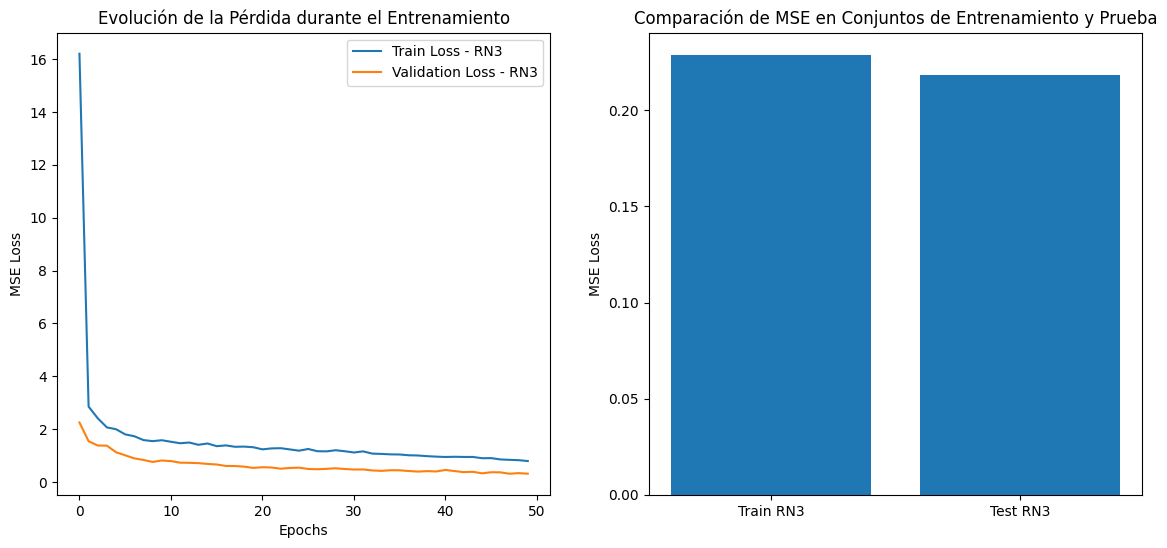

In [29]:
#misma graficas donde solo se muestre el modelo 3 
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'], label='Train Loss - RN3')
plt.plot(history3.history['val_loss'], label='Validation Loss - RN3')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Evolución de la Pérdida durante el Entrenamiento')

plt.subplot(1, 2, 2)
bars = plt.bar(['Train RN3', 'Test RN3'], 
               [mse_train3, mse_test3])
plt.ylabel('MSE Loss')
plt.title('Comparación de MSE en Conjuntos de Entrenamiento y Prueba')

plt.show()

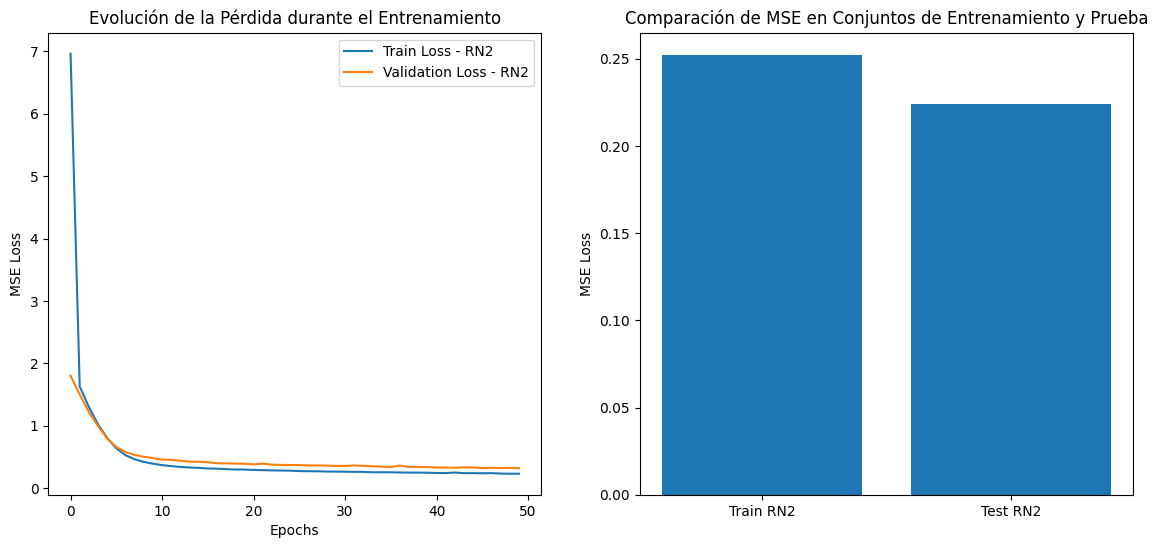

In [31]:
# muestra las graficas del modelo 2 

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Train Loss - RN2')
plt.plot(history2.history['val_loss'], label='Validation Loss - RN2')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Evolución de la Pérdida durante el Entrenamiento')

plt.subplot(1, 2, 2)
bars = plt.bar(['Train RN2', 'Test RN2'], 
               [mse_train2, mse_test2])
plt.ylabel('MSE Loss')
plt.title('Comparación de MSE en Conjuntos de Entrenamiento y Prueba')

plt.show()

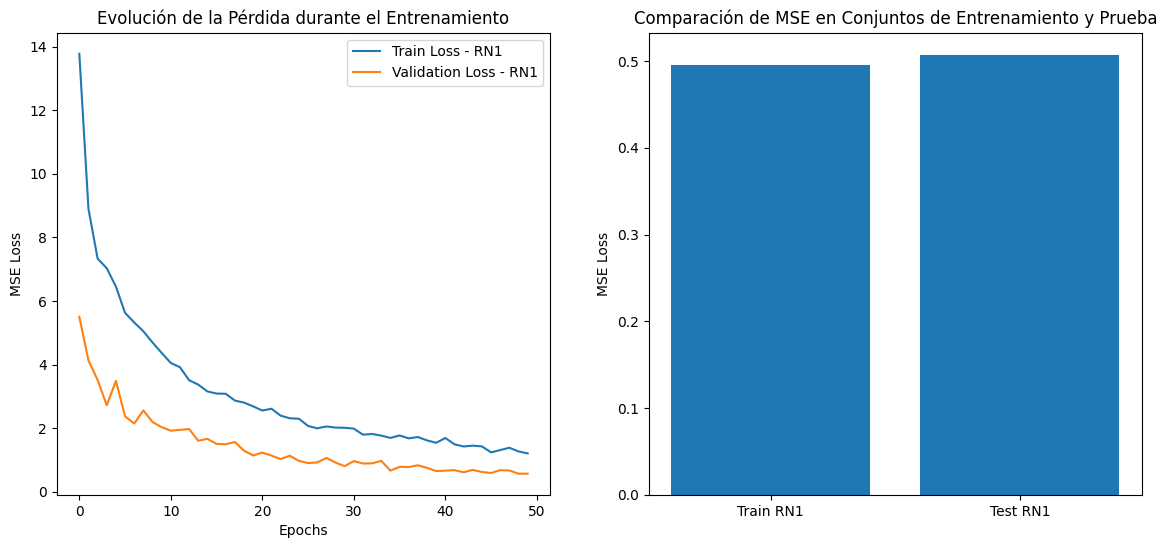

In [32]:
# muestra las graficas del modelo 1
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Train Loss - RN1')
plt.plot(history1.history['val_loss'], label='Validation Loss - RN1')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Evolución de la Pérdida durante el Entrenamiento')

plt.subplot(1, 2, 2)
bars = plt.bar(['Train RN1', 'Test RN1'], 
               [mse_train1, mse_test1])
plt.ylabel('MSE Loss')
plt.title('Comparación de MSE en Conjuntos de Entrenamiento y Prueba')

plt.show()